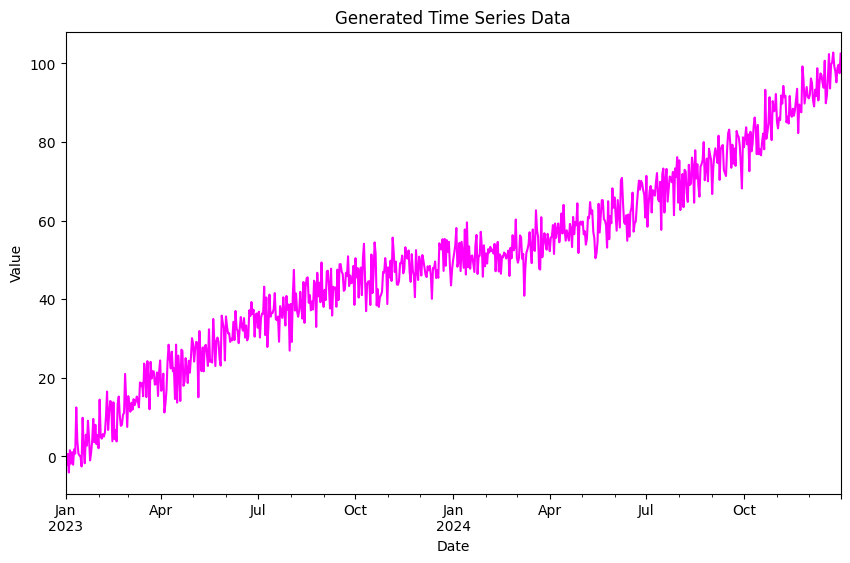

Count of missing values before handling: value    37
dtype: int64


<ipython-input-3-28975734a528>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


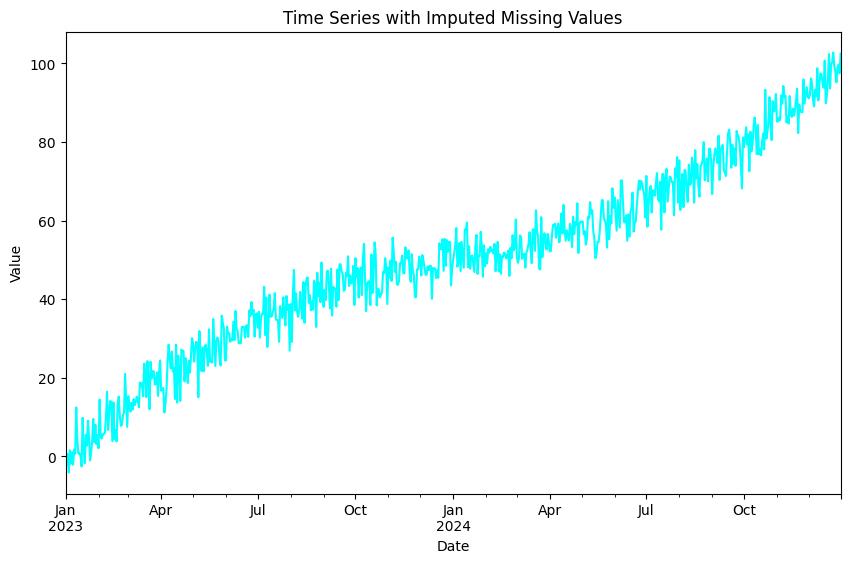

Count of missing values after handling: value    0
dtype: int64
Identified Outliers:
Empty DataFrame
Columns: [value, zscore]
Index: []


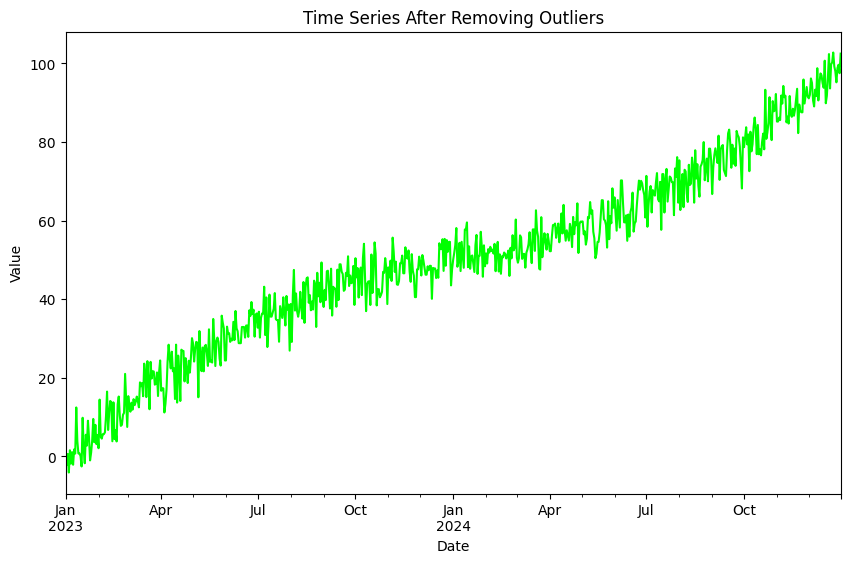

<ipython-input-3-28975734a528>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_cleaned.resample('M').mean()


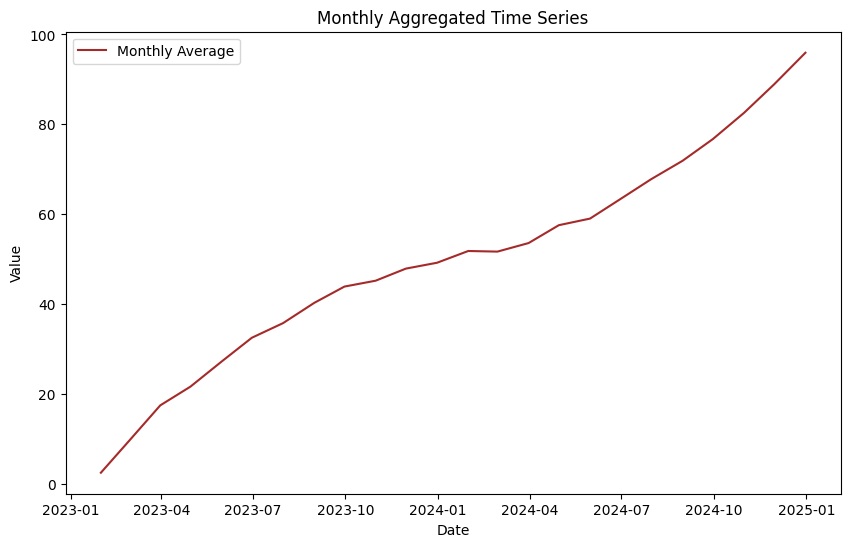

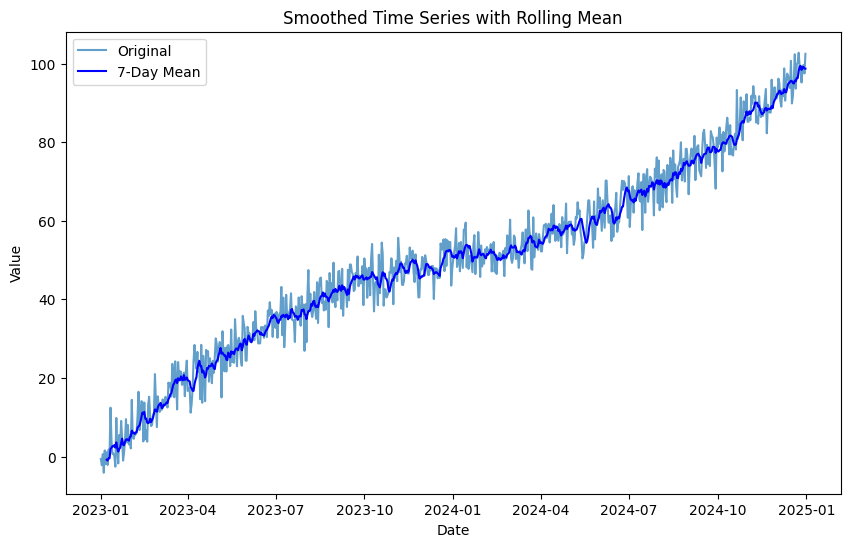

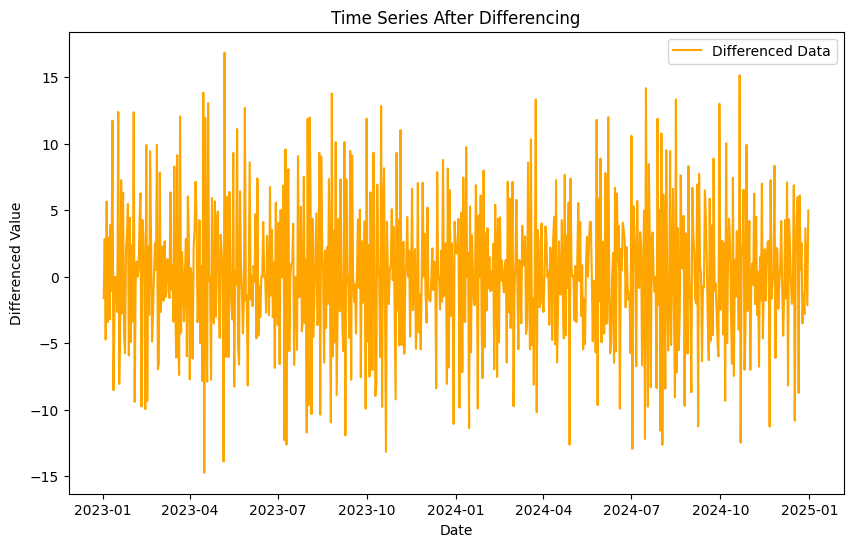

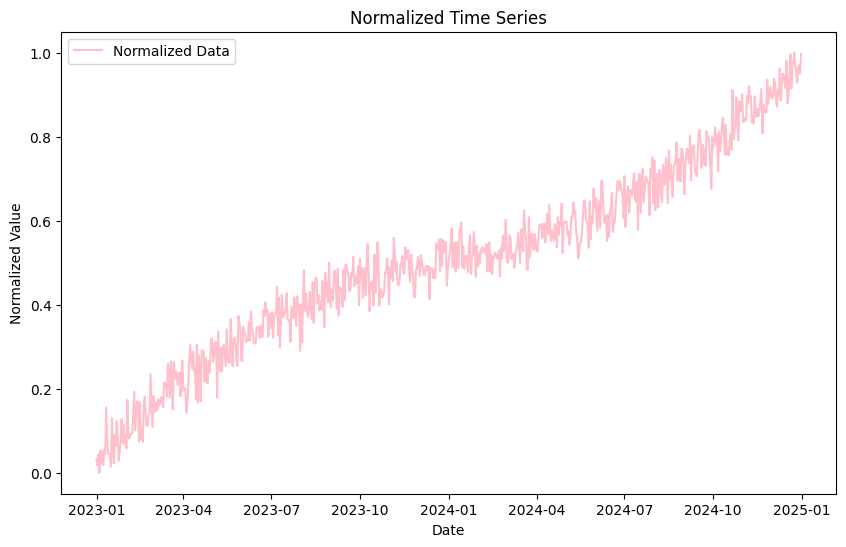

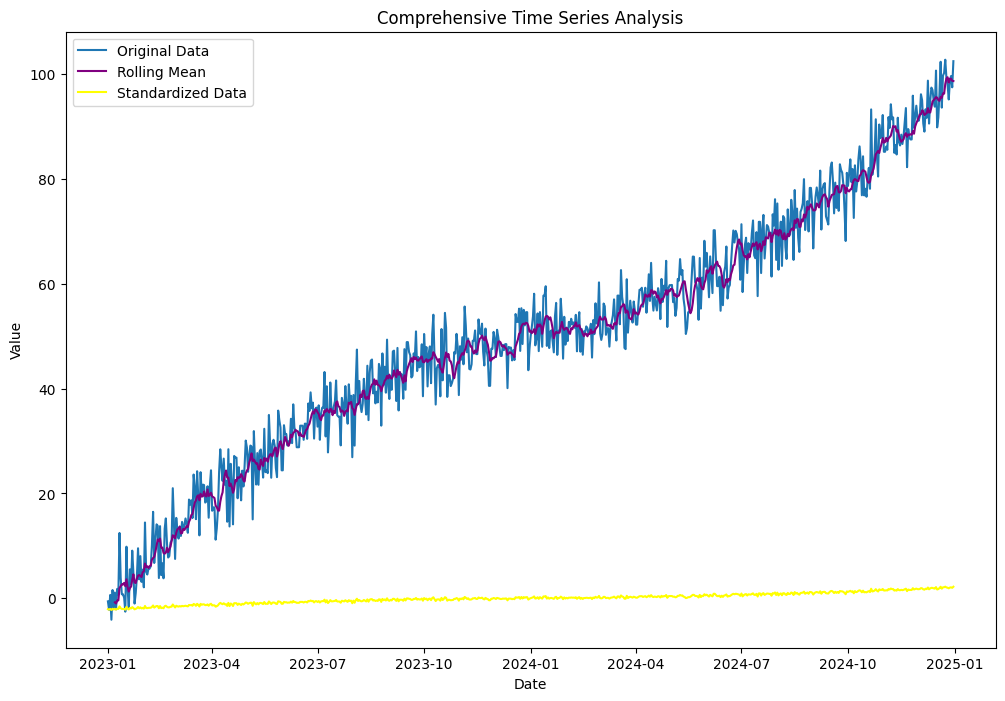

               value    zscore  rolling_mean  differenced  normalized  \
2023-01-01 -0.602958 -2.100465           NaN          NaN    0.032771   
2023-01-02 -2.207773 -2.167275           NaN    -1.604815    0.017753   
2023-01-03  0.623086 -2.049423           NaN     2.830858    0.044246   
2023-01-04 -4.104672 -2.246245           NaN    -4.727757    0.000000   
2023-01-05  1.556657 -2.010558           NaN     5.661329    0.052983   

            standardized  
2023-01-01     -2.100465  
2023-01-02     -2.167275  
2023-01-03     -2.049423  
2023-01-04     -2.246245  
2023-01-05     -2.010558  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler

date_rng = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')

trend = np.linspace(0, 100, len(date_rng))
seasonality = 10 * np.sin(np.linspace(0, 3.14 * 2, len(date_rng)))
noise = np.random.normal(0, 4, len(date_rng))
data = trend + seasonality + noise
df = pd.DataFrame(data, columns=['value'], index=date_rng)

df['value'].plot(figsize=(10, 6), color='magenta')
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

df.loc[df.sample(frac=0.05).index, 'value'] = np.nan

print("Count of missing values before handling:", df.isna().sum())

df_filled = df.fillna(method='ffill')

df_filled['value'].plot(figsize=(10, 6), color='cyan')
plt.title('Time Series with Imputed Missing Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

print("Count of missing values after handling:", df_filled.isna().sum())

df_filled['zscore'] = zscore(df_filled['value'])

outliers = df_filled[df_filled['zscore'].abs() > 3]
print("Identified Outliers:")
print(outliers)

df_cleaned = df_filled[df_filled['zscore'].abs() <= 3]

df_cleaned['value'].plot(figsize=(10, 6), color='lime')
plt.title('Time Series After Removing Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

df_monthly = df_cleaned.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['value'], label='Monthly Average', color='brown')
plt.title('Monthly Aggregated Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

df_cleaned['rolling_mean'] = df_cleaned['value'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Original', alpha=0.7)
plt.plot(df_cleaned.index, df_cleaned['rolling_mean'], label='7-Day Mean', color='blue')
plt.title('Smoothed Time Series with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

df_cleaned['differenced'] = df_cleaned['value'].diff()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['differenced'], label='Differenced Data', color='orange')
plt.title('Time Series After Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

scaler_minmax = MinMaxScaler()
df_cleaned['normalized'] = scaler_minmax.fit_transform(df_cleaned[['value']])

scaler_standard = StandardScaler()
df_cleaned['standardized'] = scaler_standard.fit_transform(df_cleaned[['value']])

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['normalized'], label='Normalized Data', color='pink')
plt.title('Normalized Time Series')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(df_cleaned.index, df_cleaned['value'], label='Original Data')
plt.plot(df_cleaned.index, df_cleaned['rolling_mean'], label='Rolling Mean', color='purple')
plt.plot(df_cleaned.index, df_cleaned['standardized'], label='Standardized Data', color='yellow')
plt.title('Comprehensive Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print(df_cleaned.head())
